In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Alright, the data is pretty massive, so I'll just take a quick gander at all the columns we're working with
data = pd.read_csv("./openpowerlifting-2023-08-12/openpowerlifting-2023-08-12-9f1b3427.csv")
data_top = data.head()
for col in data_top:
        print(col)

C:\Users\sjoke\AppData\Local\Temp\ipykernel_12940\379518849.py:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./openpowerlifting-2023-08-12/openpowerlifting-2023-08-12-9f1b3427.csv")


Name
Sex
Event
Equipment
Age
AgeClass
BirthYearClass
Division
BodyweightKg
WeightClassKg
Squat1Kg
Squat2Kg
Squat3Kg
Squat4Kg
Best3SquatKg
Bench1Kg
Bench2Kg
Bench3Kg
Bench4Kg
Best3BenchKg
Deadlift1Kg
Deadlift2Kg
Deadlift3Kg
Deadlift4Kg
Best3DeadliftKg
TotalKg
Place
Dots
Wilks
Glossbrenner
Goodlift
Tested
Country
State
Federation
ParentFederation
Date
MeetCountry
MeetState
MeetTown
MeetName


In [3]:
data_top

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [4]:
#First hypothesis: "Men lift more than women in total weight lifted = Squat-Bench-Deadlift"
#Data is filtered accordingly
filtered_data = data.loc[(data["Event"] == "SBD") & (data["Equipment"] == "Raw") & (data["Federation"] == "IPF")]
men_total = filtered_data[filtered_data["Sex"] == "M"]["TotalKg"]
women_total = filtered_data[filtered_data["Sex"] == "F"]["TotalKg"]


In [5]:
#Routine checkup and cleanup
print(women_total.isnull().sum())
print(men_total.isnull().sum())

#Let's drop the rows with empty values, as it interferes with testing
men_total = men_total.dropna()
women_total = women_total.dropna()

73
169


<Axes: xlabel='TotalKg', ylabel='Count'>

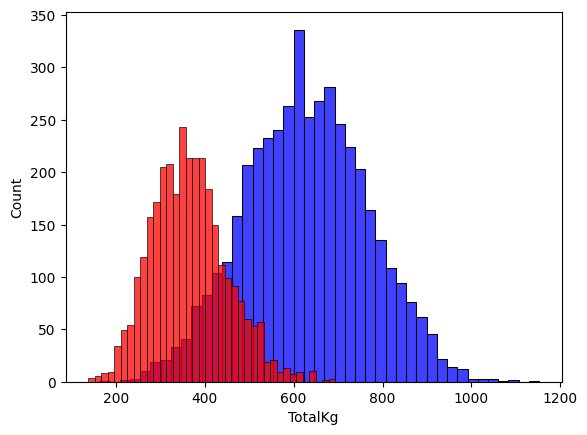

In [6]:
#Let's take a look at the distribution of data
sns.histplot(men_total, color='blue', label='Men')
sns.histplot(women_total, color='red', label='Women')

In [7]:
#The difference is clear in the graph, but let's perform a t-test
t_stat, p_value = stats.ttest_ind(men_total, women_total)
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Hypothesis 1: Men lift more than women (TotalKg) is supported.")
else:
    print("Hypothesis 1: Men lift more than women (TotalKg) is not supported.")

t-statistic: 94.79492392841424
p-value: 0.0
Hypothesis 1: Men lift more than women (TotalKg) is supported.


In [8]:
#We'll just iterate the process for the next hypotheses, starting with "Men bench press more than women"

men_bench = filtered_data[filtered_data["Sex"] == "M"]["Best3BenchKg"]
women_bench = filtered_data[filtered_data["Sex"] == "F"]["Best3BenchKg"]

men_bench = men_bench.dropna()
women_bench = women_bench.dropna()

men_bench = men_bench[men_bench >= 0]
women_bench = women_bench[women_bench >= 0]


<Axes: xlabel='Best3BenchKg', ylabel='Count'>

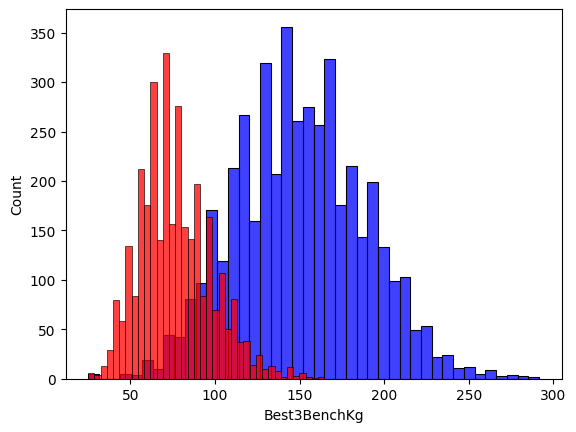

In [9]:
sns.histplot(men_bench, color='blue', label='Men')
sns.histplot(women_bench, color='red', label='Women')

In [10]:
t_stat, p_value = stats.ttest_ind(men_bench, women_bench)
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print("Hypothesis 2: Men bench press more than women is supported.")
else:
    print("Hypothesis 2: Men bench press more than women is not supported.")

t-statistic: 98.0485057920161
p-value: 0.0
Hypothesis 2: Men bench press more than women is supported.


#####
From here on, I'll just iterate. The whole code will be included in a seperate .py file, which also generates a Streamlit site, with all the data.
#####

In [11]:
# Hypothesis 3: Men lift more than women when bodyweight is 50-55kg
# Hypothesis 4: Men lift more than women when bodyweight is 100-105kg


men_total_50kg = filtered_data[(filtered_data["Sex"] == "M") & (filtered_data["BodyweightKg"] >= 50) & (filtered_data["BodyweightKg"] <= 55)]["TotalKg"]
women_total_50kg = filtered_data[(filtered_data["Sex"] == "F") & (filtered_data["BodyweightKg"] >= 50) & (filtered_data["BodyweightKg"] <= 55)]["TotalKg"]

men_total_100kg = filtered_data[(filtered_data["Sex"] == "M") & (filtered_data["BodyweightKg"] >= 100) & (filtered_data["BodyweightKg"] <= 105)]["TotalKg"]
women_total_100kg = filtered_data[(filtered_data["Sex"] == "F") & (filtered_data["BodyweightKg"] >= 100) & (filtered_data["BodyweightKg"] <= 105)]["TotalKg"]

men_total_50kg = men_total_50kg.dropna()
men_total_100kg = men_total_100kg.dropna()
women_total_50kg = women_total_50kg.dropna()
women_total_100kg = women_total_100kg.dropna()

In [12]:
t_stat1, p_value1 = stats.ttest_ind(men_total_50kg, women_total_50kg)
t_stat2, p_value2 = stats.ttest_ind(men_total_100kg, women_total_100kg)
print("t-statistic:", t_stat1)
print("p-value:", p_value1)
print("t-statistic2:", t_stat2)
print("p-value2:", p_value2)

alpha = 0.05  
if p_value1 < alpha:
    print("Hypothesis 3: Men lift more than women in the 50-55kg bodyweight range is supported.")
else:
    print("Hypothesis 3: Men lift more than women in the 50-55kg bodyweight range is not supported.")

if p_value2 < alpha:
    print("Hypothesis 4: Men lift more than women in the 100-105kg bodyweight range is supported.")
else:
    print("Hypothesis 4: Men lift more than women in the 100-105kg bodyweight range is not supported.")


t-statistic: 12.774417125709174
p-value: 1.8237705358360204e-32
t-statistic2: 19.038947098051707
p-value2: 9.213849412750742e-63
Hypothesis 3: Men lift more than women in the 50-55kg bodyweight range is supported.
Hypothesis 4: Men lift more than women in the 100-105kg bodyweight range is supported.


<Axes: xlabel='TotalKg', ylabel='Count'>

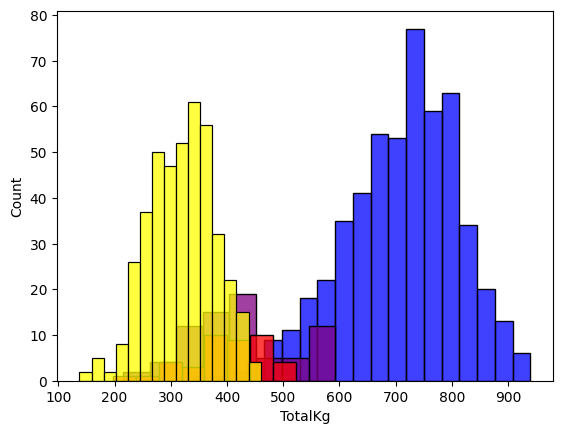

In [13]:
sns.histplot(men_total_100kg, color='blue', label='WPC')
sns.histplot(men_total_50kg, color='purple', label='IPF')
sns.histplot(women_total_100kg, color='red', label='WPC')
sns.histplot(women_total_50kg, color='yellow', label='IPF')

In [14]:
#Hypothesis 5: Men lift more in IPF than in WPC (compare "TotalKg" lifts)

men_total_IPF = filtered_data[filtered_data["Sex"] == "M"]["TotalKg"]
WPC_data = data.loc[(data["Event"] == "SBD") & (data["Equipment"] == "Raw") & (data["Federation"] == "WPC")]
men_total_WPC = WPC_data[WPC_data["Sex"] == "M"]["TotalKg"]

men_total_IPF = men_total_IPF.dropna()
men_total_WPC = men_total_WPC.dropna()

<Axes: xlabel='TotalKg', ylabel='Count'>

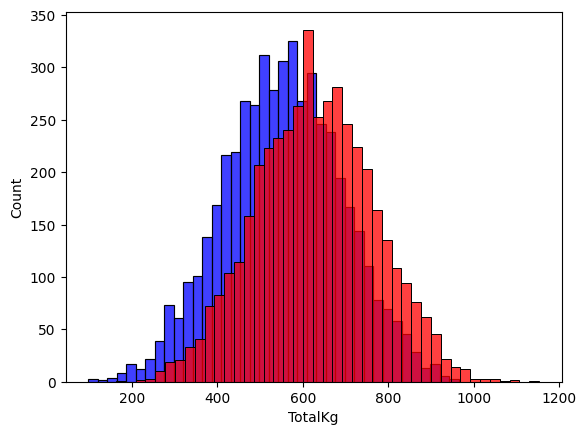

In [15]:
sns.histplot(men_total_WPC, color='blue', label='WPC')
sns.histplot(men_total_IPF, color='red', label='IPF')

In [16]:
t_stat, p_value = stats.ttest_ind(men_total_IPF, men_total_WPC)
print("t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Hypothesis 5: Men lift more in IPF than in WPC is supported.")
else:
    print("Hypothesis 5: Men lift more in IPF than in WPC is not supported.")

t-statistic: 26.16302620607868
p-value: 1.2016299906421084e-145
Hypothesis 5: Men lift more in IPF than in WPC is supported.


In [17]:
#Hypothesis 6: Lifter country affects TotalKg

# Perform an ANOVA test to assess the impact of "Country" on "TotalKg"
model = ols('TotalKg ~ Country', data=filtered_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

alpha = 0.05  

p_value = anova_table['PR(>F)'][0]

if p_value < alpha:
    print("Hypothesis 6: Lifter country affects TotalKg is supported. There is a significant difference in TotalKg among countries.")
else:
    print("Hypothesis 6: Lifter country affects TotalKg is not supported. There is no significant difference in TotalKg among countries.")

Hypothesis 6: Lifter country affects TotalKg is supported. There is a significant difference in TotalKg among countries.


c:\Users\sjoke\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 101, but rank is 100
  warnings.warn('covariance of constraints does not have full '
